# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Lindsey Sullivan
### GitHub Respository: https://github.com/LindseySully/Module_06

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Prerequisites


In [152]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                       Version
----------------------------- ---------------
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
black                         22.6.0
bleac

### Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [153]:
#parser = html5lib
parser = 'html.parser'

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

with open('laser-headlights.pkl','wb') as f:
    pickle.dump(article_page.text,f)

### Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [154]:
with open('laser-headlights.pkl', 'rb') as f:
    article_html = pickle.load(f)

In [155]:
soup = BeautifulSoup(article_html,parser)

In [156]:
article_element = soup.find('article')
#displays all HTML of the article
print(article_element)

<article class="post-466450 post type-post status-publish format-standard has-post-thumbnail hentry category-car-hacks category-engineering category-featured category-laser-hacks category-slider tag-laser tag-laser-headlight tag-laser-headlights tag-light" id="post-466450" itemscope="" itemtype="http://schema.org/Article">
<header class="entry-header">
<h1 class="entry-title" itemprop="name">How Laser Headlights Work</h1>
<div class="entry-meta">
<a class="comments-counts" href="https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/#comments"><span class="icon-hackaday icon-hackaday-comment"></span>
                130 Comments            </a>
<ul class="meta-authors vcard author">
<li>by:</li>
<span class="fn"><a class="author url fn" href="https://web.archive.org/web/20210327165005/https://hackaday.com/author/lewinday/" rel="author" title="Posts by Lewin Day">Lewin Day</a></span>
</ul>
</div><!-- .entry-meta -->
<div class="entry-meta en

In [157]:
print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [158]:
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

def frequent_tokens(token):
    return not(token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if frequent_tokens(token)]
print('All Tokens:',interesting_tokens)
print('-----')
# 5 most frequent tokens

word_freq = Counter(map(str,interesting_tokens))
print('Frequency of top 5 tokens:', word_freq.most_common(5))



All Tokens: [Laser, Headlights, Work, 130, Comments, Lewin, Day, March, 22, 2021, think, onward, march, automotive, technology, headlights, usually, thing, come, mind, Engines, fuel, efficiency, switch, electric, power, mind, mean, thousands, engineers, world, working, improve, state, art, automotive, lighting, day, day, Sealed, beam, headlights, gave, way, modern, designs, regulations, loosened, bulbs, moved, simple, halogens, xenon, HIDs, recently, LEDs, new, technology, scene, lasers, Laser, Headlights, BWM, prototype, laser, headlight, assemblies, undergoing, testing, image, brought, mind, phrase, laser, headlights, laser, beams, firing, automobile, Obviously, coherent, beams, monochromatic, light, poor, illumination, outside, specific, spot, distance, away, Thankfully, eyes, laser, headlights, work, way, Instead, laser, headlights, consist, solid, state, laser, diodes, mounted, inside, headlight, blue, lasers, fired, yellow, phosphor, similar, white, LEDs, produces, powerful, vibr

### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [159]:
interesting_lemmas = [token.lemma_.lower() for token in doc if frequent_tokens(token)]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(5))

[('laser', 40), ('headlight', 28), ('beam', 12), ('technology', 10), ('light', 10)]


In [160]:
#storing lemmas
lemmas_q5 = set()
for lemma, freq in lemma_freq.most_common(5):
    lemmas_q5.add(lemma)
print(lemmas_q5)

{'laser', 'technology', 'beam', 'headlight', 'light'}


### Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [161]:

def score_sentence_by_tokens(sentence, interesting_tokens):
  nlp = spacy.load('en_core_web_sm')
  doc = nlp(sentence)
  number_of_tokens = sum(1 for token in doc if token.text.lower() in interesting_tokens)
  
  #calculating score
  num_words_in_sentence = len(doc)
  score = number_of_tokens/num_words_in_sentence
  
  return score

In [162]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
  nlp = spacy.load('en_core_web_sm')
  doc = nlp(sentence)
  interesting_lemmas_set = set(interesting_lemmas)
  number_of_lemmas = sum(1 for token in doc if token.lemma_.lower())

# calculating score
  num_words_in_sentence = len(doc)
  score = number_of_lemmas/num_words_in_sentence

  return score

In [163]:
test_sentence = 'When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.'
print("Score of Tokens by Sentence:", score_sentence_by_tokens(test_sentence,tokens_q5))
print("Score of Lemmas by Sentence:", score_sentence_by_lemma(test_sentence,lemmas_q5))

Score of Tokens by Sentence: 0.08695652173913043
Score of Lemmas by Sentence: 1.0


### Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

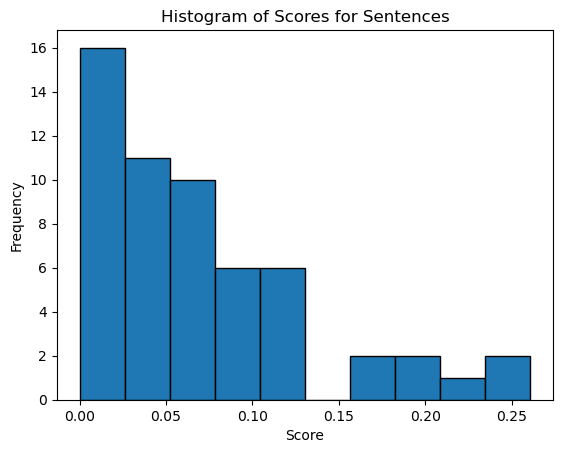

In [164]:
def score_sentence_by_tokens(sentence, interesting_tokens):
  nlp = spacy.load('en_core_web_sm')
  doc = nlp(sentence)
  
  number_of_tokens = sum(1 for token in doc if token.text.lower() in interesting_tokens)
  
  #calculating score
  num_words_in_sentence = len(doc)
  score = number_of_tokens/num_words_in_sentence
  
  return score

article_text = article_element.get_text()
doc = nlp(article_text)

sentences = [sent.text for sent in doc.sents]

def frequent_tokens(token):
  return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.text.lower() for token in doc if frequent_tokens(token)]

token_counter = Counter(interesting_tokens)
top_5_tokens = [token for token, count in token_counter.most_common(5)]

scores = [score_sentence_by_tokens(sentence,top_5_tokens) for sentence in sentences]

#histogram
plt.hist(scores, bins=10, edgecolor ='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores for Sentences')
plt.show()

The most common ranges of scores falls between 0.0 & around .10

### Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

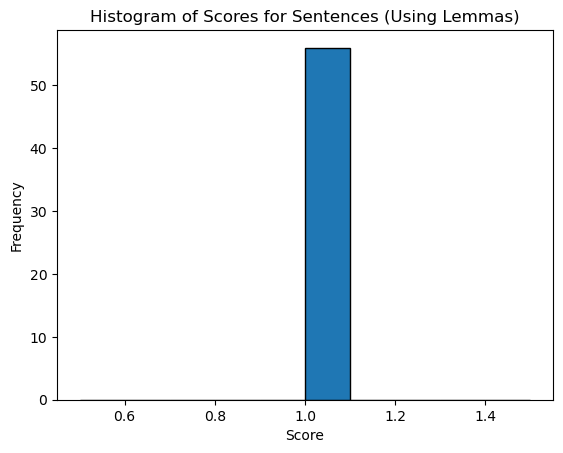

In [165]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
  nlp = spacy.load('en_core_web_sm')
  doc = nlp(sentence)
  interesting_lemmas_set = set(interesting_lemmas)
  number_of_lemmas = sum(1 for token in doc if token.lemma_.lower())

# calculating score
  num_words_in_sentence = len(doc)
  score = number_of_lemmas/num_words_in_sentence

  return score

doc = nlp(article_text)

def frequent_lemmas(token):
  return not (token.is_space or token.is_punct or token.is_stop)

interesting_lemmas = [token.lemma_.lower() for token in doc if frequent_lemmas(token)]

lemma_counter = Counter(interesting_lemmas)

top_5_lemmas = [lemma for lemma, count in lemma_counter.most_common(5)]

scores = [score_sentence_by_lemma(sentence, top_5_lemmas) for sentence in sentences]

plt.hist(scores, bins=10, edgecolor ='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores for Sentences (Using Lemmas)')
plt.show()

The most common range for mine was the 1.0 score -- I don't have a strong feeling this is correct however, but based on how the code worked it is what was returned. I'll be curious to explore more and of my fellow students work to see where I may have gone wrong within the module. 

### Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

SpaCy has a linguistic feature so we'd be able to add in token.pos -- the token position and set it to 'NOUN' to return only Nouns.

In [166]:
import os
os.system('jupyter nbconvert --to html web-scraping.ipynb')

0